#  Surprise Housing - House Sales Prediction

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Objectives

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- [Technical] determine the optimal value of lambda for ridge and lasso regression.

## Business Goal

- Model the price of houses with the available independent variables
- This model will then be used by the management to understand how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split,GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE

# settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)

## Loading Data

In [163]:
original_ds = pd.read_csv("train.csv")
ds = original_ds
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [164]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [165]:
# reusable functions

q3 = 0.9
q1 = 0.1

def get_percentage(x):
    return round(100*x,2)

def get_iqr(ds, col):
    return ds[col].quantile(q3) - ds[col].quantile(q1)

def get_upperlimit(ds, col):
    return ds[col].quantile(q3) + (1.5 * (get_iqr(ds,col)))

def get_upperlimit_extreme(ds, col):
    return ds[col].quantile(q3) + (3 * (get_iqr(ds,col)))

def get_lowerlimit(ds, col):
    return ds[col].quantile(q1) - (1.5 * (get_iqr(ds,col)))

def get_lowerlimit_extreme(ds, col):
    return ds[col].quantile(q1) - (3 * (get_iqr(ds,col)))

def get_percentage_of_upper(ds, col):
    total = len(ds)
    upper_limit = get_upperlimit(ds,col)
    return round(ds[ds[col] > upper_limit].shape[0]/total * 100,2)

def get_percentage_of_lower(ds, col):
    total = len(ds)
    low_limit = get_lowerlimit(ds,col)
    return get_percentage(ds[ds[col] < low_limit].shape[0]/total)
    
def get_percentage_of_upper_extreme(ds, col):
    total = len(ds)
    upper_limit_extreme = get_upperlimit_extreme(ds,col)
    return get_percentage(ds[ds[col] > upper_limit_extreme].shape[0]/total)

def get_key_predictors(model, df):
    coef = pd.Series(model.coef_, index = df.columns)
    imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
    return imp_coef;


## Data Clean up

In [166]:
# dropping columns not required for analysis.
ds = ds.drop(['Id'], axis=1)

In [167]:
ds.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.

In [168]:
# Get percentage of missing values per each feature 
print(get_percentage(ds.isna().sum()/len(ds)))

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

## Treating Missing Values

Mean  - 70.04995836802665
Median  - 69.0


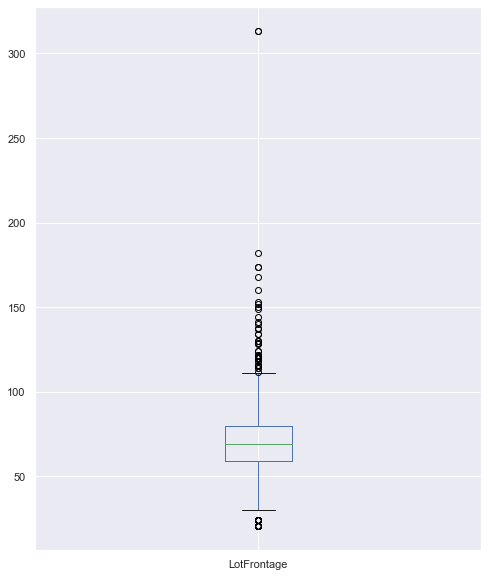

In [169]:
# treating "Lot Frontage" - Linear feet connected to property
print("Mean  - " + str(ds['LotFrontage'].mean()))
print("Median  - " + str(ds['LotFrontage'].median()))
ds['LotFrontage'].plot.box()

In [170]:
# getting data between higher and lower hinge
ds_lf_without_outliers = ds.LotFrontage[(ds.LotFrontage < 110) & (ds.LotFrontage > 30)]
print("{0}% of data has median of {1} and mean of {2}".format(get_percentage(ds_lf_without_outliers.count()/len(ds)), ds_lf_without_outliers.median(), ds_lf_without_outliers.mean()))

75.34% of data has median of 69.0 and mean of 68.90545454545455


In [171]:
# filling na with median
ds['LotFrontage'].fillna(ds['LotFrontage'].median(), inplace = True)

In [172]:
# Treating data where missing values are < 5% 

# For the following columns missing rows can be remove as per the % missing is too low
cols_with_na = ["MasVnrType", "MasVnrArea", "Electrical"]

# For the following columns NA should be replaced with None, since there is no garage, no basement
cols_which_need_replacement_forna = ["GarageCond", "GarageQual", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu"]

# for the following columns more than 90% of the data is "None" hence we can drop them since there is no representation 
# and we will not be able to detect any patterns
cols_with_no_good_representation =  ["PoolQC", "Fence", "MiscFeature", "Alley"]

for col in cols_with_na:
    ds = ds[~(ds[col].isna())]

for col in cols_which_need_replacement_forna:
    ds[col].fillna('None', inplace = True)

for col in cols_with_no_good_representation:
    ds.drop(col, inplace = True, axis = 1)

# Validate if there are more data with missing values
print(get_percentage(ds.isna().sum()/len(ds)))

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

In [173]:
# Saving the cleaned dataset
ds.to_csv("ds_clean.csv")
ds_clean = pd.read_csv("ds_clean.csv", index_col=0)
ds_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [174]:
# converting from int type to object to treat the variables as categorical variables
ds_clean['MSSubClass'] = ds_clean['MSSubClass'].astype('object')
ds_clean['OverallQual'] = ds_clean['OverallQual'].astype('object')
ds_clean['OverallCond'] = ds_clean['OverallCond'].astype('object')
ds_clean['BsmtFullBath'] = ds_clean['BsmtFullBath'].astype('object')
ds_clean['BsmtHalfBath'] = ds_clean['BsmtHalfBath'].astype('object')
ds_clean['FullBath'] = ds_clean['FullBath'].astype('object')
ds_clean['HalfBath'] = ds_clean['HalfBath'].astype('object')
ds_clean['BedroomAbvGr'] = ds_clean['BedroomAbvGr'].astype('object')
ds_clean['KitchenAbvGr'] = ds_clean['KitchenAbvGr'].astype('object')
ds_clean['TotRmsAbvGrd'] = ds_clean['TotRmsAbvGrd'].astype('object')
ds_clean['Fireplaces'] = ds_clean['Fireplaces'].astype('object')
ds_clean['GarageCars'] = ds_clean['GarageCars'].astype('object')

## Treating Outliers

In [175]:
# Treat outliers above upper limit the rest can be treated during scaling

def get_outliers(df, threshold=0):
    outliers = []
    cols = ["feature", "per_above_upper_limit", "per_below_lower_limit"]

    for col in df.select_dtypes(include=["int64", "float64"]).columns:
        outlier = []
        outlier.append(col)
        outlier.append(get_percentage_of_upper(df, col))
        outlier.append(get_percentage_of_lower(df, col))
        outliers.append(outlier)
        #print(outlier)

    outliers_df = pd.DataFrame(outliers,columns=cols)
    outliers_above_threshold = outliers_df[outliers_df.per_above_upper_limit > threshold]

    # features with outliers above "threshold"
    print(outliers_above_threshold) 
    return outliers_above_threshold

outliers_above_threshold = get_outliers(ds_clean) 
# Based on the above calculation the below features have outliers above "threshold" so let us treat the outliers.

          feature  per_above_upper_limit  per_below_lower_limit
0     LotFrontage                   0.48                    0.0
1         LotArea                   1.59                    0.0
4      MasVnrArea                   0.90                    0.0
5      BsmtFinSF1                   0.07                    0.0
6      BsmtFinSF2                   6.34                    0.0
8     TotalBsmtSF                   0.34                    0.0
9        1stFlrSF                   0.21                    0.0
11   LowQualFinSF                   1.79                    0.0
12      GrLivArea                   0.28                    0.0
14     WoodDeckSF                   0.34                    0.0
15    OpenPorchSF                   0.48                    0.0
16  EnclosedPorch                   0.62                    0.0
17      3SsnPorch                   1.65                    0.0
18    ScreenPorch                   7.99                    0.0
19       PoolArea                   0.48

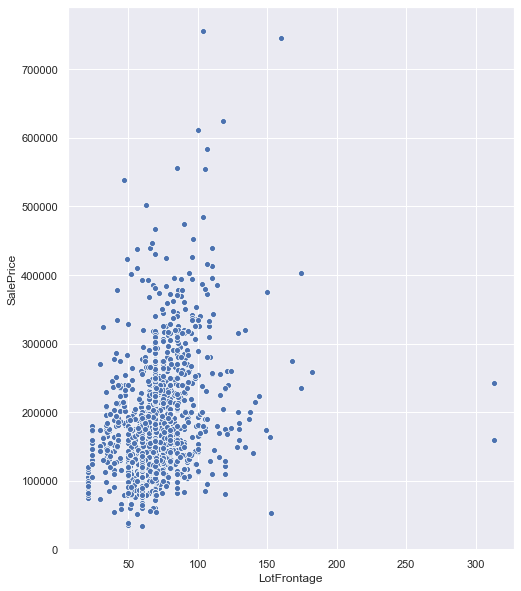

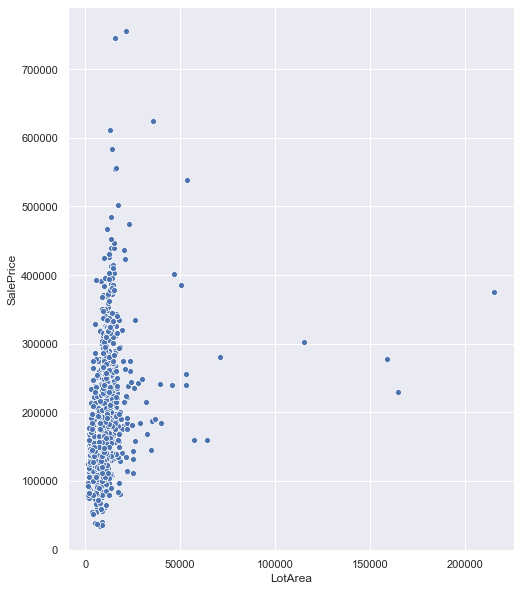

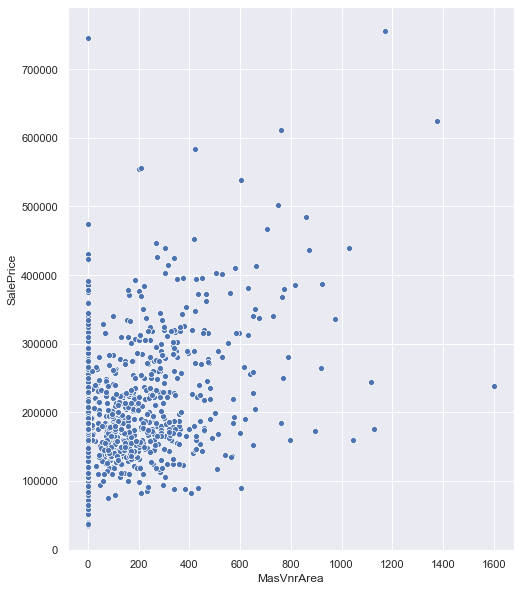

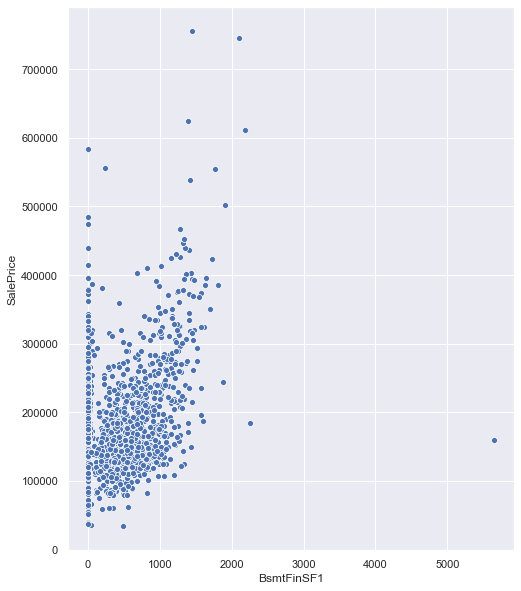

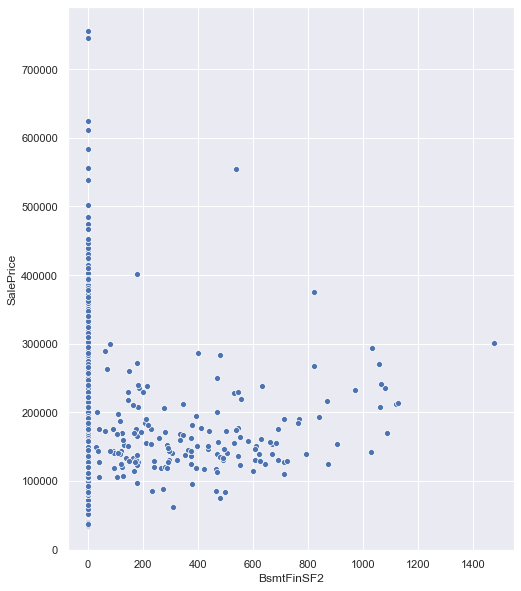

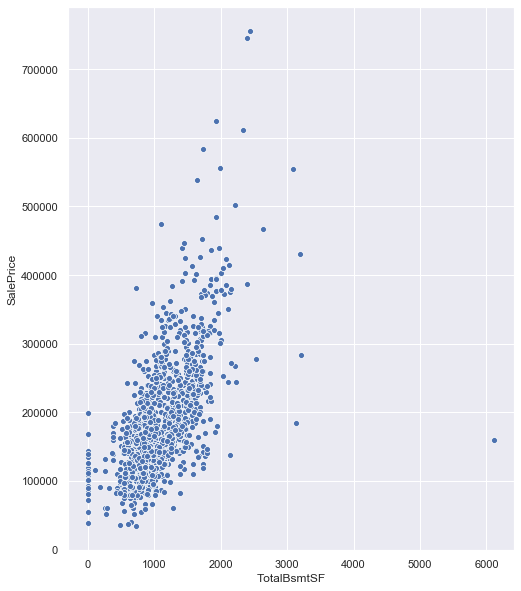

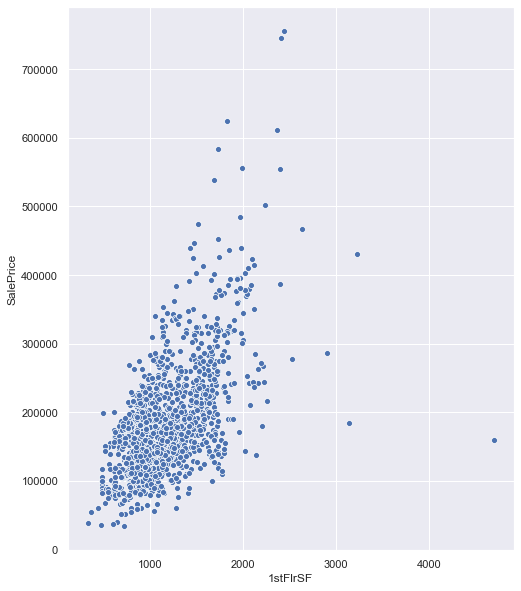

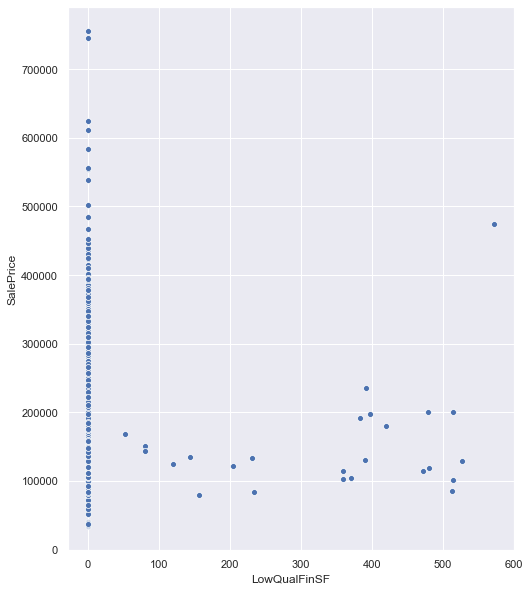

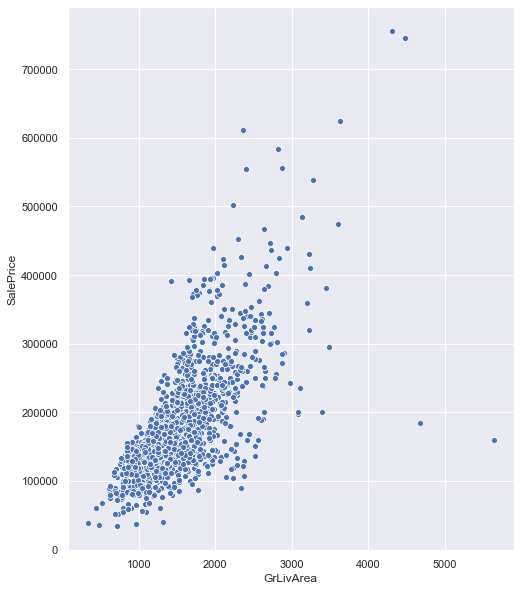

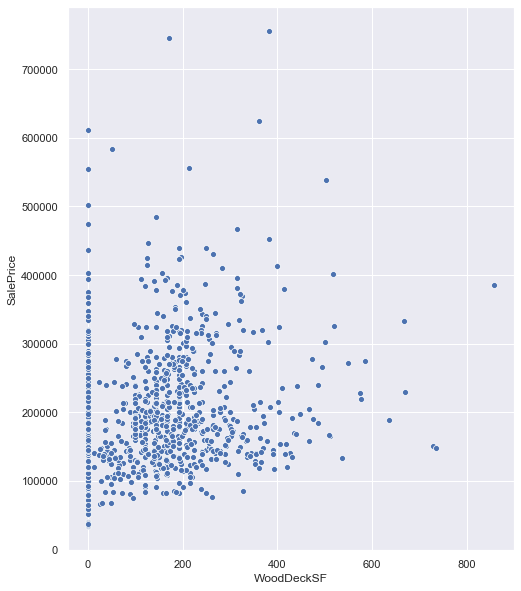

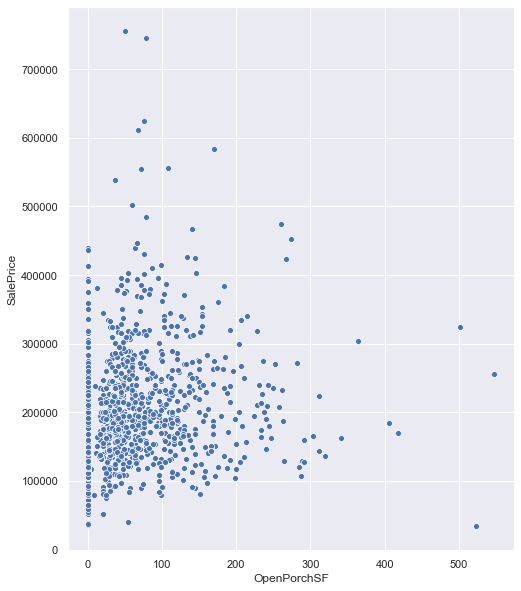

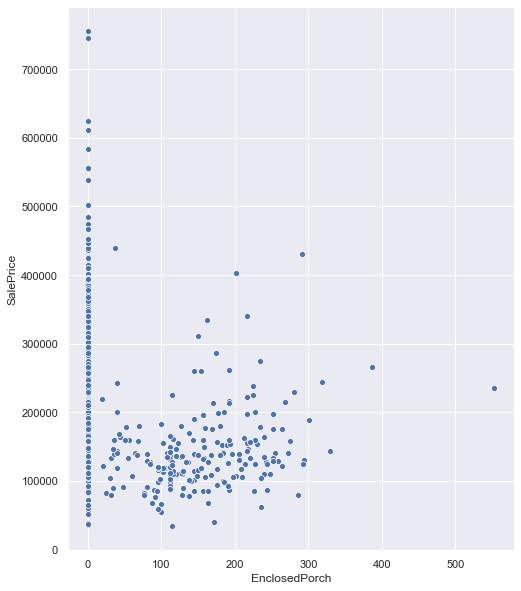

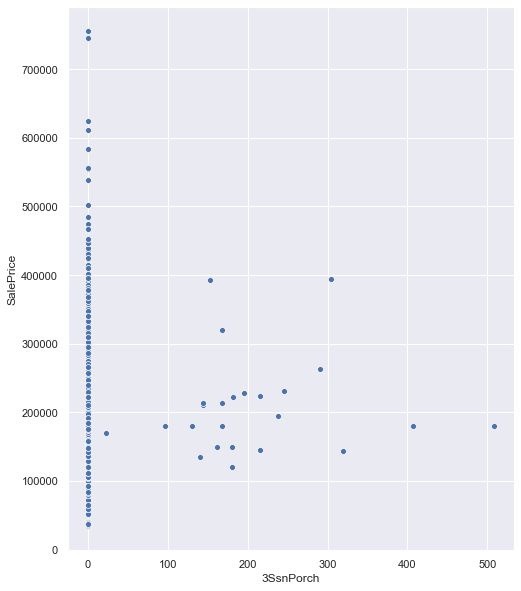

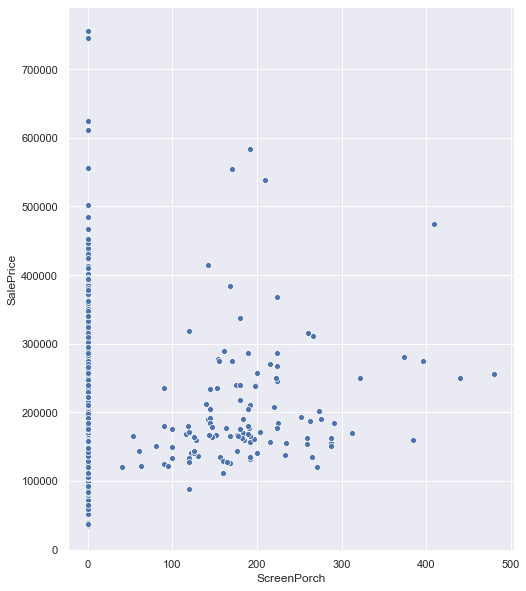

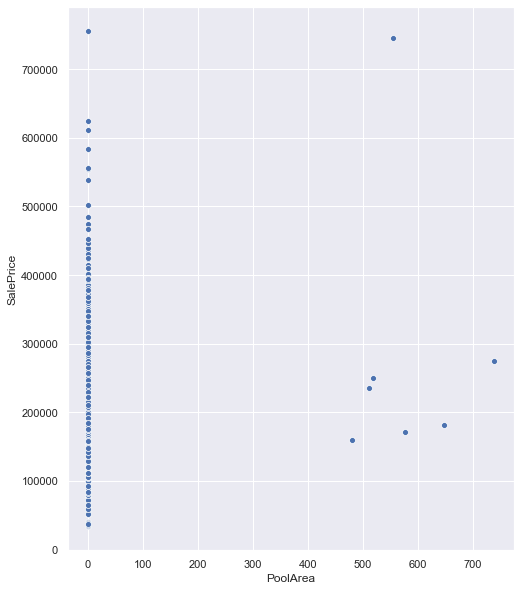

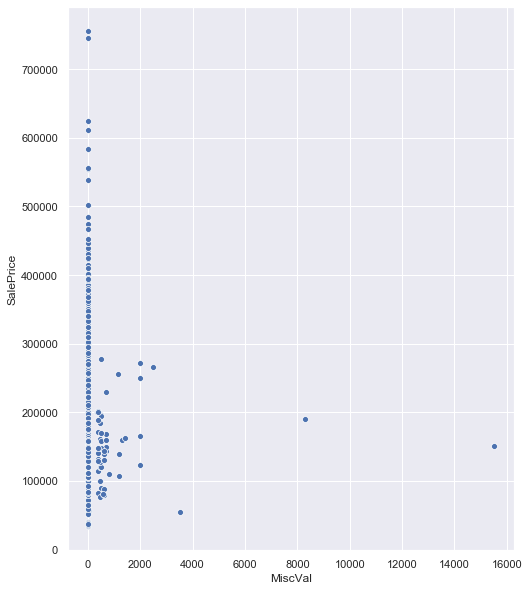

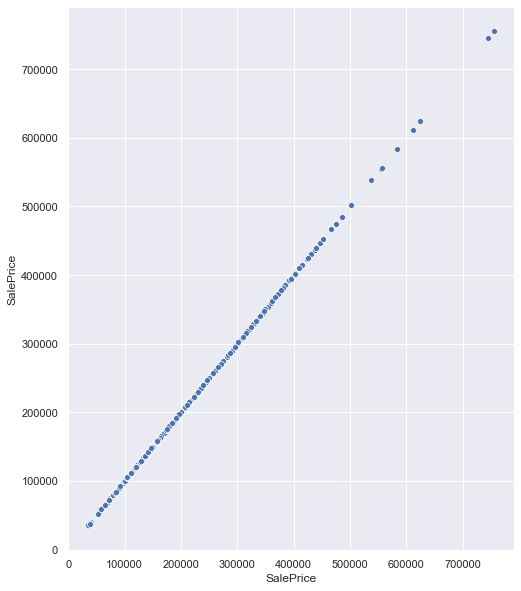

In [176]:
# Now let us look at each col's distrubution 1 by 1
cols_for_treatment = []
for col in outliers_above_threshold["feature"]:
    plt.figure()
    sns.scatterplot(ds_clean[col], ds_clean["SalePrice"])
    cols_for_treatment.append(col)

In [177]:
# let us look at the data distribution of the cols identified with outliers. 
ds_clean[cols_for_treatment].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,69.845624,10507.808408,103.75672,442.274983,46.838043,1056.310131,1161.551344,5.880772,1514.174363,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,180624.101999
std,22.044429,9992.987081,181.10815,455.369276,161.777324,437.914609,385.002532,48.771560,525.799521,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,79312.128273
min,21.000000,1300.000000,0.00000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7537.500000,0.00000,0.000000,0.000000,795.000000,882.000000,0.000000,1128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000
50%,69.000000,9477.000000,0.00000,381.000000,0.000000,991.000000,1086.000000,0.000000,1464.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162500.000000
75%,79.000000,11600.000000,166.00000,707.000000,0.000000,1297.500000,1391.000000,0.000000,1776.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14375.000000,335.00000,1064.000000,119.000000,1602.000000,1680.000000,0.000000,2158.000000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,104.000000,17308.500000,456.00000,1272.000000,398.000000,1749.000000,1827.000000,0.000000,2464.000000,335.000000,173.000000,180.000000,0.000000,160.000000,0.000000,0.000000,325812.000000
99%,137.500000,37802.000000,792.00000,1572.500000,832.000000,2155.500000,2212.000000,360.000000,3126.000000,506.000000,286.000000,261.500000,168.000000,268.500000,0.000000,700.000000,439390.000000


### Treating each col. 1 by 1.

In [178]:

col = "BsmtFinSF2"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = ((ds_clean[col] >= upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))

# verdict - since 88% of the data is 0, the representation value of this col. is 0 hence this can be removed
ds_clean.drop(col, axis=1, inplace=True)

Upper limit : 297.5
Lower limit : -178.5
Number of datapoints with 0s: 88.4906960716747
Outliers that can be removed : 92


In [179]:
col = "BsmtHalfBath"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = ((ds_clean[col] >= upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))

# verdict - since 94% of the data is 0, the representation value of this col. is 0 hence this can be removed
ds_clean.drop(col, axis=1, inplace=True)

Upper limit : 0.0
Lower limit : 0.0
Number of datapoints with 0s: 94.3487250172295
Outliers that can be removed : 1451


In [180]:
col = "ScreenPorch"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = ((ds_clean[col] >= upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))

# verdict - since 91% of the data is 0, the representation value of this col. is 0 hence this can be removed
ds_clean.drop(col, axis=1, inplace=True)

Upper limit : 0.0
Lower limit : 0.0
Number of datapoints with 0s: 92.00551343900759
Outliers that can be removed : 1451


In [181]:
col = "MiscVal"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = outliers_removed = ((ds_clean[col] >= upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))

# verdict - since 96% of the data is 0, the representation value of this col. is 0 hence this can be removed
# another reason for removal is because we removed the corresponding column Misc feature.
ds_clean.drop(col, axis=1, inplace=True)

Upper limit : 0.0
Lower limit : 0.0
Number of datapoints with 0s: 96.41626464507236
Outliers that can be removed : 1451


In [182]:
col = "LotFrontage"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = outliers_removed = ((ds_clean[col] >= upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))
ds_clean = ds_clean[(ds_clean[col] >= lower_limit) & (ds_clean[col] <= upper_limit)]

Upper limit : 156.5
Lower limit : -15.5
Number of datapoints with 0s: 0.0
Outliers that can be removed : 7


In [183]:
col = "LotArea"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = ((ds_clean[col] < lower_limit) | (ds_clean[col] > upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))
ds_clean = ds_clean[(ds_clean[col] >= lower_limit) & (ds_clean[col] <= upper_limit)]

Upper limit : 28056.75
Lower limit : -8834.050000000001
Number of datapoints with 0s: 0.0
Outliers that can be removed : 22


In [184]:
col = "MasVnrArea"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = ((ds_clean[col] < lower_limit) | (ds_clean[col] > upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))
ds_clean = ds_clean[(ds_clean[col] >= lower_limit) & (ds_clean[col] <= upper_limit)]

Upper limit : 800.0
Lower limit : -480.0
Number of datapoints with 0s: 58.09786354238456
Outliers that can be removed : 13


In [185]:
col = "TotalBsmtSF"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = outliers_removed = ((ds_clean[col] < lower_limit) | (ds_clean[col] > upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))
ds_clean = ds_clean[(ds_clean[col] >= lower_limit) & (ds_clean[col] <= upper_limit)]

Upper limit : 3005.5
Lower limit : -795.3000000000002
Number of datapoints with 0s: 2.5499655410062028
Outliers that can be removed : 3


In [186]:
col = "1stFlrSF"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = outliers_removed = ((ds_clean[col] < lower_limit) | (ds_clean[col] > upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))
ds_clean = ds_clean[(ds_clean[col] >= lower_limit) & (ds_clean[col] <= upper_limit)]

Upper limit : 3003.5
Lower limit : -592.5
Number of datapoints with 0s: 0.0
Outliers that can be removed : 0


In [187]:
col = "LowQualFinSF"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = outliers_removed = ((ds_clean[col] < lower_limit) | (ds_clean[col] > upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))
ds_clean.drop(col, axis=1, inplace=True)

Upper limit : 0.0
Lower limit : 0.0
Number of datapoints with 0s: 95.17574086836665
Outliers that can be removed : 25


In [188]:
col = "WoodDeckSF"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = outliers_removed = ((ds_clean[col] < lower_limit) | (ds_clean[col] > upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))
ds_clean = ds_clean[(ds_clean[col] >= lower_limit) & (ds_clean[col] <= upper_limit)]

Upper limit : 632.5
Lower limit : -379.5
Number of datapoints with 0s: 50.99931082012405
Outliers that can be removed : 4


In [189]:
col = "OpenPorchSF"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = outliers_removed = ((ds_clean[col] < lower_limit) | (ds_clean[col] > upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))
ds_clean = ds_clean[(ds_clean[col] >= lower_limit) & (ds_clean[col] <= upper_limit)]

Upper limit : 325.0
Lower limit : -195.0
Number of datapoints with 0s: 43.9696760854583
Outliers that can be removed : 6


In [190]:
col = "EnclosedPorch"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = outliers_removed = ((ds_clean[col] > upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))
ds_clean.drop(col, axis=1, inplace=True)

Upper limit : 280.0
Lower limit : -168.0
Number of datapoints with 0s: 82.35699517574086
Outliers that can be removed : 7


In [191]:
col = "3SsnPorch"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = outliers_removed = ((ds_clean[col] > upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))
ds_clean.drop(col, axis=1, inplace=True)

Upper limit : 0.0
Lower limit : 0.0
Number of datapoints with 0s: 94.55547898001379
Outliers that can be removed : 24


In [192]:
col = "PoolArea"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = outliers_removed = ((ds_clean[col] > upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))
ds_clean.drop(col, axis=1, inplace=True)

Upper limit : 0.0
Lower limit : 0.0
Number of datapoints with 0s: 95.93383873190903
Outliers that can be removed : 4


In [193]:
col = "SalePrice"
upper_limit = get_upperlimit(ds_clean, col)
lower_limit = get_lowerlimit(ds_clean, col)
outliers_removed = outliers_removed = ((ds_clean[col] < lower_limit) | (ds_clean[col] > upper_limit)).sum()
print("Upper limit : {0}".format(upper_limit))
print("Lower limit : {0}".format(lower_limit))
print("Number of datapoints with 0s: {0}".format(get_percentage(ds_clean[col] == 0).sum()/len(ds[col])))
print("Outliers that can be removed : {0}".format(outliers_removed))
ds_clean = ds_clean[(ds_clean[col] >= lower_limit) & (ds_clean[col] <= upper_limit)]

Upper limit : 520075.0
Lower limit : -142925.0
Number of datapoints with 0s: 0.0
Outliers that can be removed : 3


In [194]:
get_outliers(ds_clean)

       feature  per_above_upper_limit  per_below_lower_limit
0  LotFrontage                   0.14                    0.0
4   MasVnrArea                   0.14                    0.0


,feature,per_above_upper_limit,per_below_lower_limit
0,LotFrontage,0.14,0.0
4,MasVnrArea,0.14,0.0


In [195]:
ds_clean.to_csv("ds_clean_withoutoutliers.csv")
ds_clean = pd.read_csv("ds_clean_withoutoutliers.csv", index_col=0)
ds_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1458
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1393 non-null   int64  
 1   MSZoning       1393 non-null   object 
 2   LotFrontage    1393 non-null   float64
 3   LotArea        1393 non-null   int64  
 4   Street         1393 non-null   object 
 5   LotShape       1393 non-null   object 
 6   LandContour    1393 non-null   object 
 7   Utilities      1393 non-null   object 
 8   LotConfig      1393 non-null   object 
 9   LandSlope      1393 non-null   object 
 10  Neighborhood   1393 non-null   object 
 11  Condition1     1393 non-null   object 
 12  Condition2     1393 non-null   object 
 13  BldgType       1393 non-null   object 
 14  HouseStyle     1393 non-null   object 
 15  OverallQual    1393 non-null   int64  
 16  OverallCond    1393 non-null   int64  
 17  YearBuilt      1393 non-null   int64  
 18  YearRemo

In [196]:
# converting from int type to object to treat the variables as categorical variables
ds_clean['MSSubClass'] = ds_clean['MSSubClass'].astype('object')
ds_clean['OverallQual'] = ds_clean['OverallQual'].astype('object')
ds_clean['OverallCond'] = ds_clean['OverallCond'].astype('object')
ds_clean['BsmtFullBath'] = ds_clean['BsmtFullBath'].astype('object')
ds_clean['FullBath'] = ds_clean['FullBath'].astype('object')
ds_clean['HalfBath'] = ds_clean['HalfBath'].astype('object')
ds_clean['BedroomAbvGr'] = ds_clean['BedroomAbvGr'].astype('object')
ds_clean['KitchenAbvGr'] = ds_clean['KitchenAbvGr'].astype('object')
ds_clean['TotRmsAbvGrd'] = ds_clean['TotRmsAbvGrd'].astype('object')
ds_clean['Fireplaces'] = ds_clean['Fireplaces'].astype('object')
ds_clean['GarageCars'] = ds_clean['GarageCars'].astype('object')

# Univariate Analysis

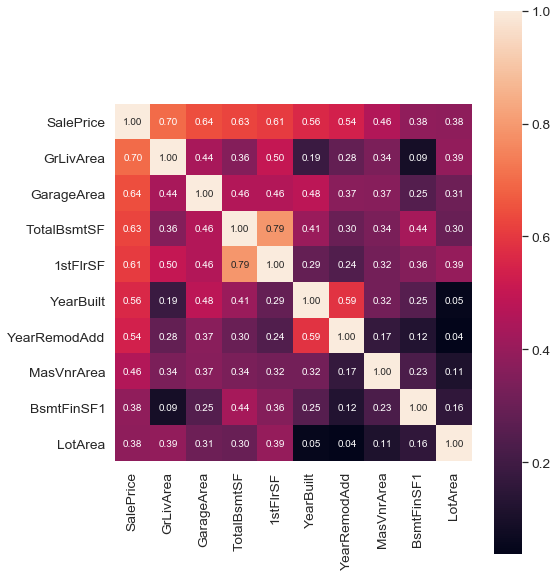

In [197]:
# Let us get 10 key continuous variables with highest correlation

cols = ds_clean.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(ds_clean[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, 
                 annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Top 5 Features which have highest correlation with sales price. 

- GrLiveArea
- GarageArea (multicolinear with GarageCars - hence we should exclude one of them, Assuming here RFE will eliminate it)
- TotalBsmtSF
- 1stFlrSF
- MasVnrArea

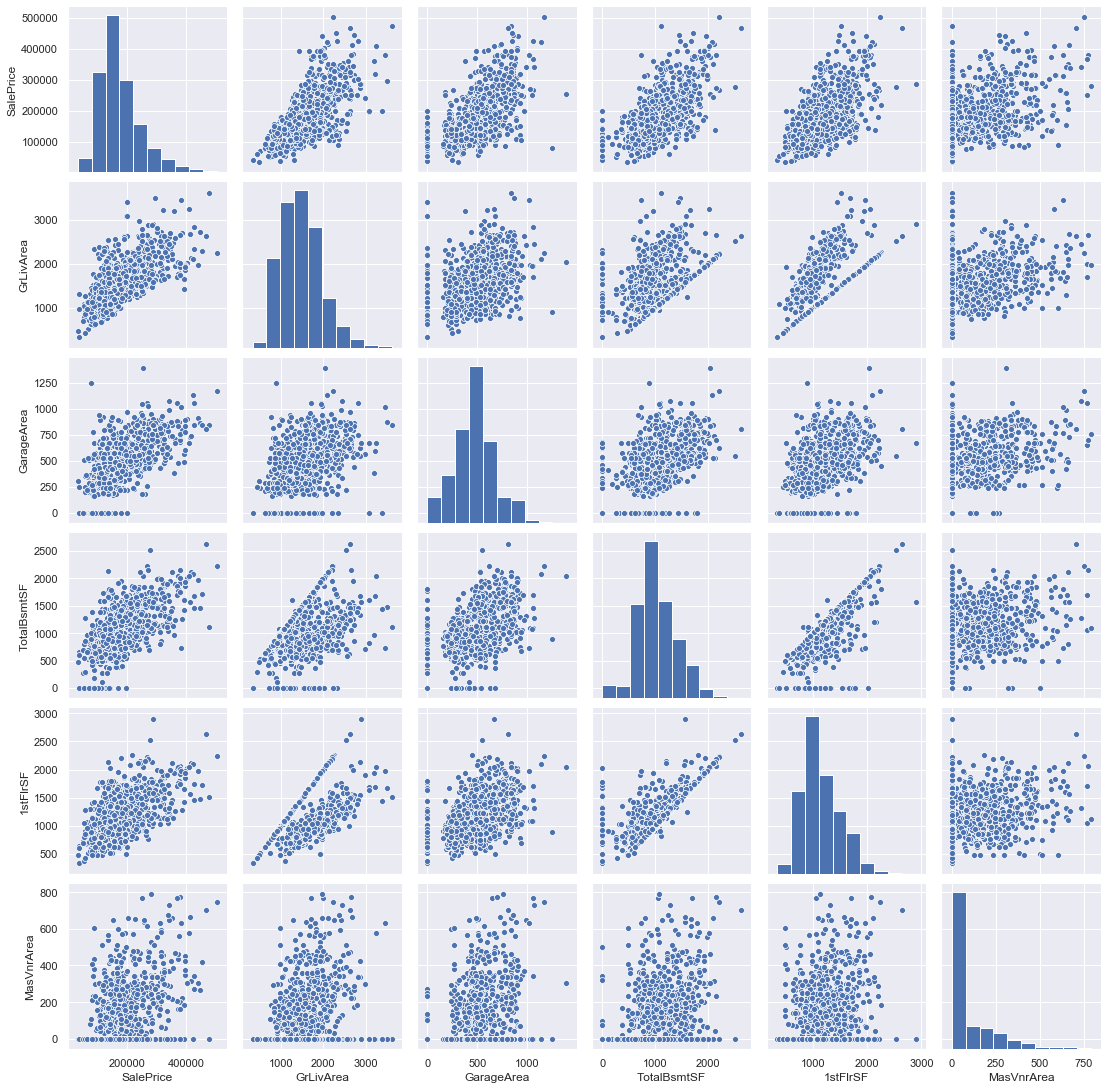

In [198]:
# Let us see the data distribution for these 5 key predictors, observe patterns

sns.set()
var = ['SalePrice','GrLivArea', 'GarageArea', 'TotalBsmtSF', "1stFlrSF", "MasVnrArea"]
sns.pairplot(ds_clean[var], size=2.5)
plt.show()

### Univariate analysis with Categorical columns

<Figure size 576x720 with 0 Axes>

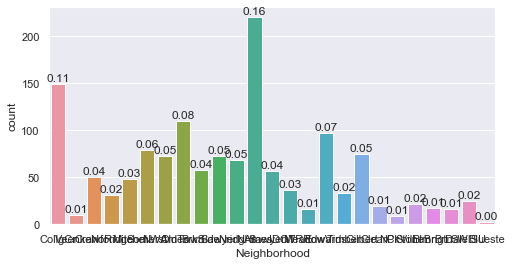

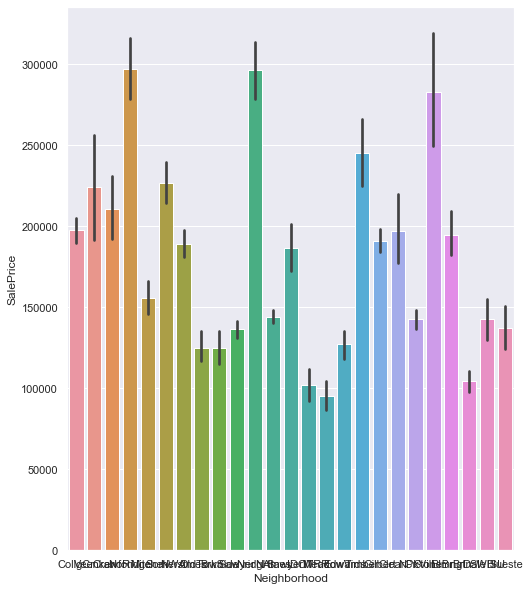

<Figure size 576x720 with 0 Axes>

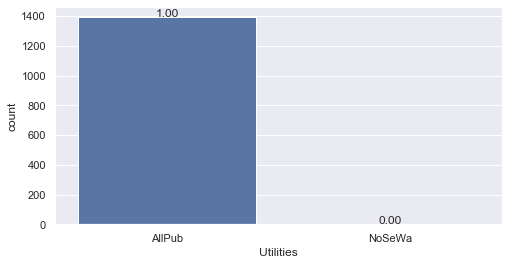

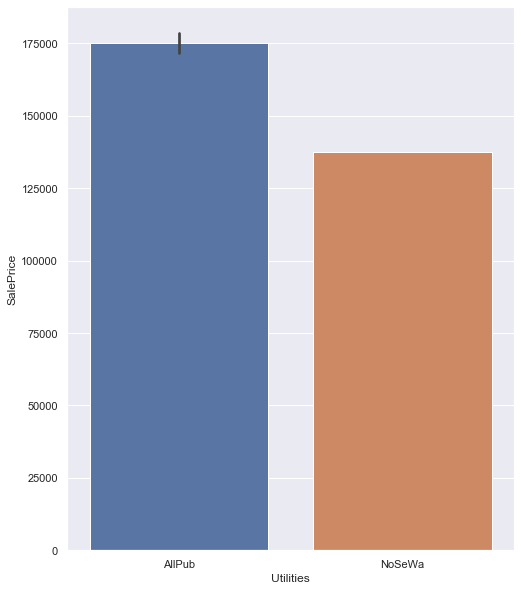

<Figure size 576x720 with 0 Axes>

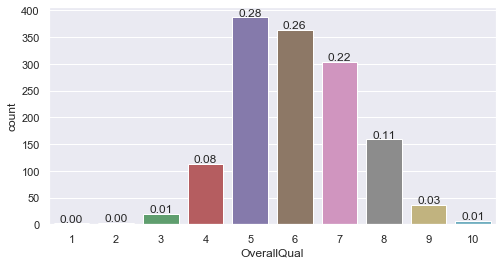

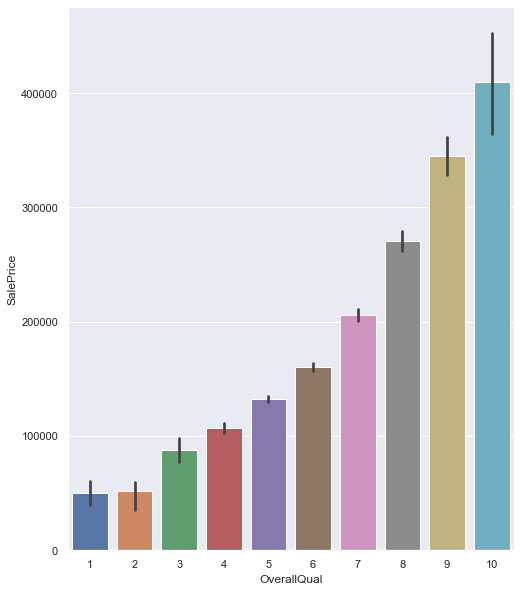

<Figure size 576x720 with 0 Axes>

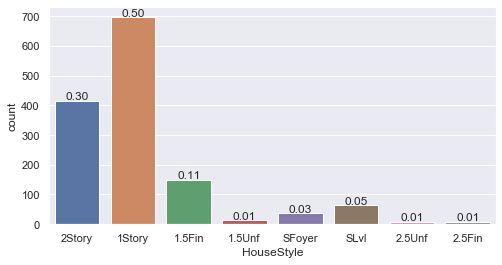

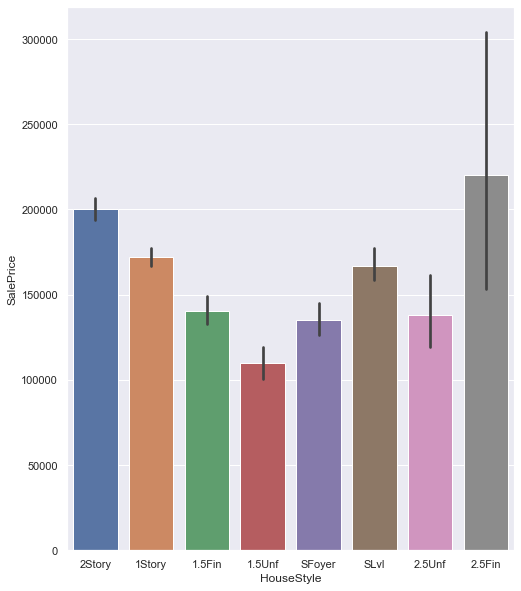

<Figure size 576x720 with 0 Axes>

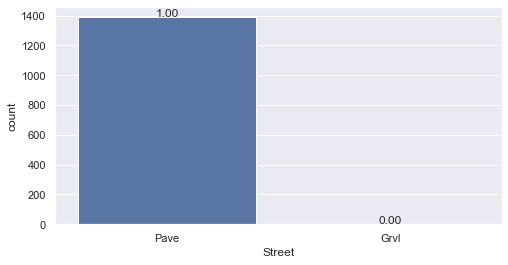

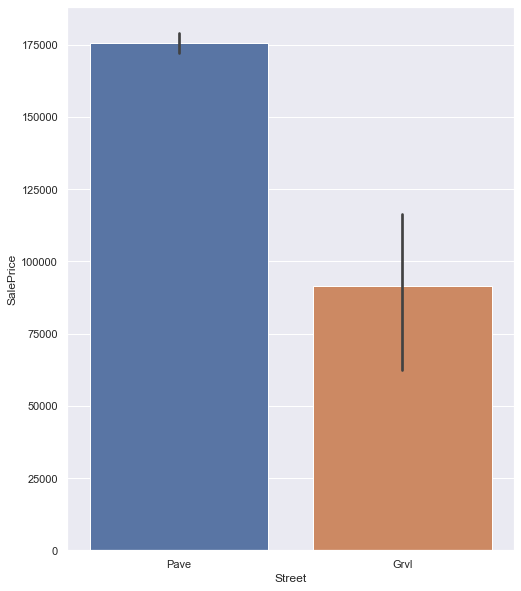

<Figure size 576x720 with 0 Axes>

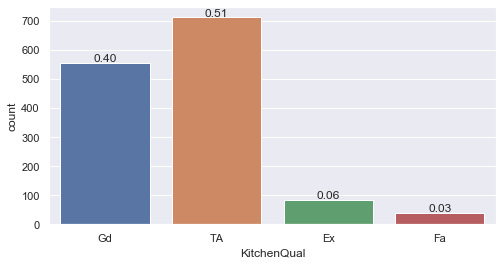

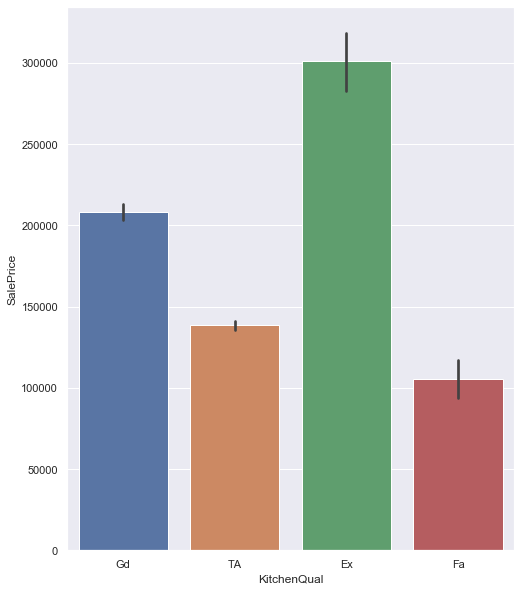

<Figure size 576x720 with 0 Axes>

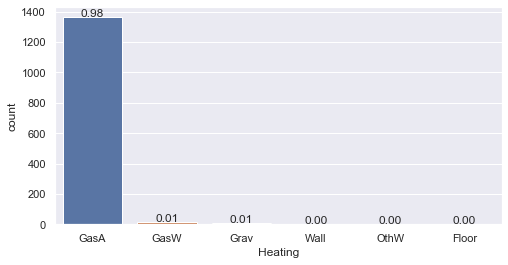

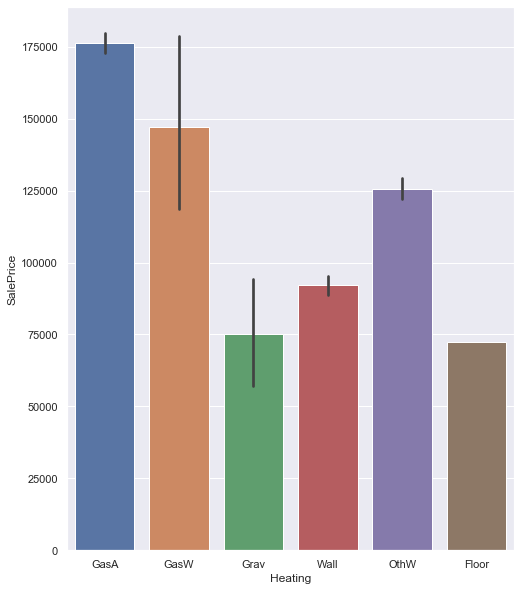

<Figure size 576x720 with 0 Axes>

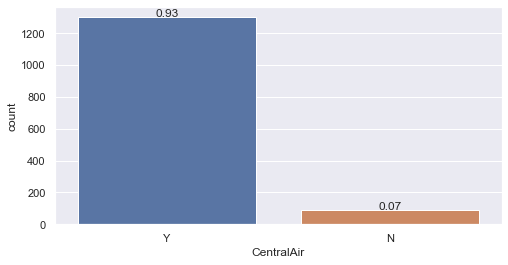

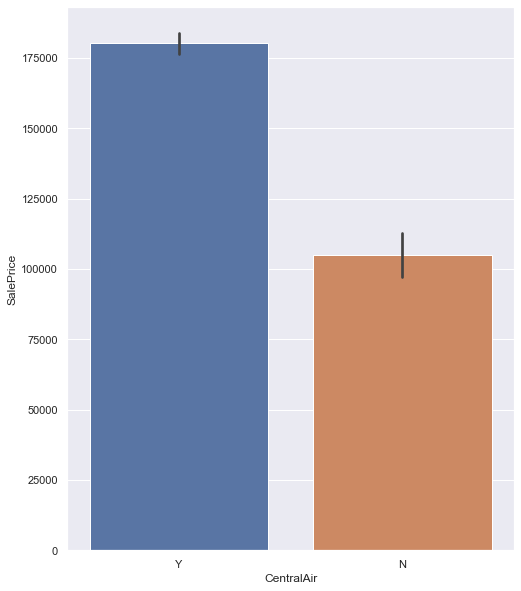

<Figure size 576x720 with 0 Axes>

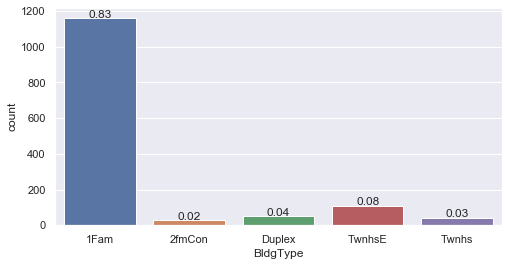

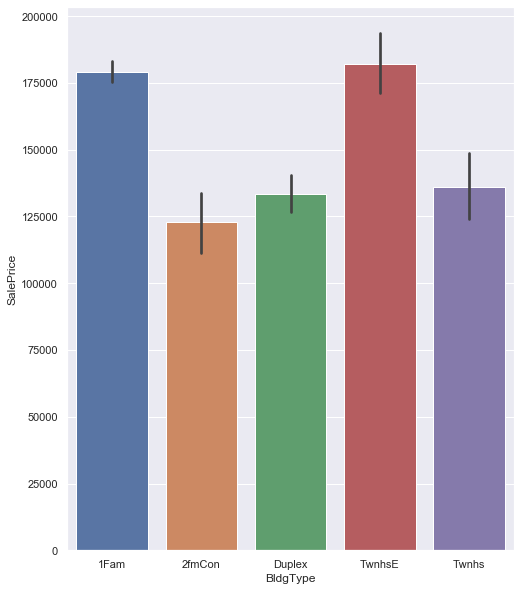

<Figure size 576x720 with 0 Axes>

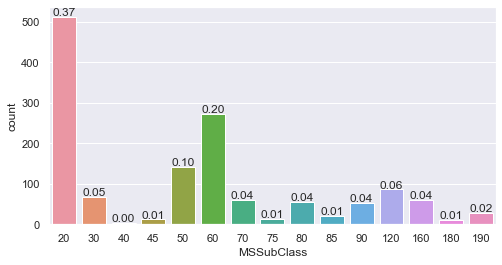

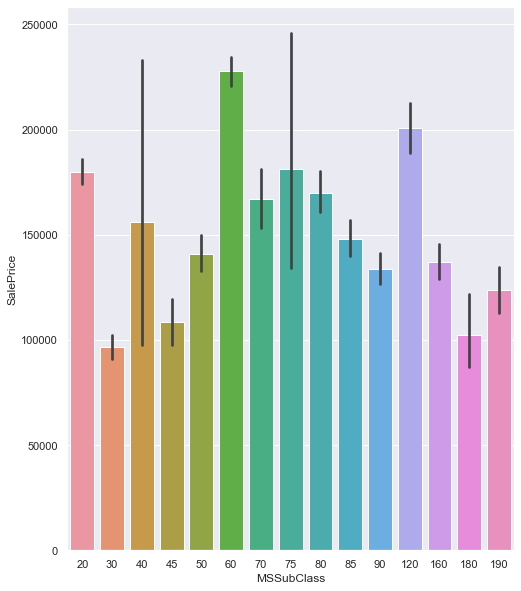

<Figure size 576x720 with 0 Axes>

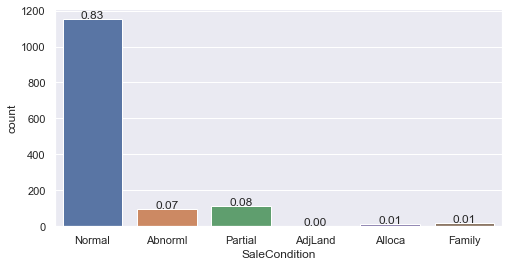

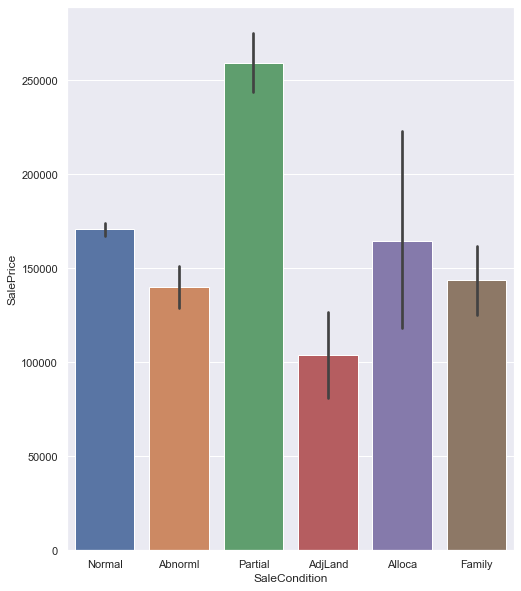

In [199]:
# Let us look at the distribution of few categorical data and collect insights
# here we are getting which features contributed to more sales and total sale price for each category

# we can choose these from domain knowledge, just to get sense of key categories
# Here I looked at all the graphs and choose the below, and excluded the remaining. 
categorical_cols_for_analysis = ["Neighborhood", "Utilities", "OverallQual", "HouseStyle", "Street", "KitchenQual", "Heating", "CentralAir","BldgType","MSSubClass", "SaleCondition"]

# for each chosen column we will get 2 graphs
# 1 - count of sales in each category
# 2 - total sales price in each category
for col in categorical_cols_for_analysis:
    plt.figure()
    plt.figure(figsize=(8,4))
    #ds_clean[col].value_counts().plot.bar()
    total = float(len(ds_clean)) # one person per row 
    ax = sns.countplot(x=col,data=ds_clean) 
    for p in ax.patches:
         height = p.get_height()
         ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format
         (height/total),ha="center") 
    plt.figure()
    sns.barplot(x=col,y="SalePrice", data=ds_clean)

## Analysis data 

TSP = Total Sale Price


Insights 
----------------------------------------------------------------------------------
- MSSubClass: Identifies the type of dwelling involved in the sale.
  20, 60, 50 subclasses have highest sales count
  Highest TSP (Total sale price) is from subclasses 60, 120 and 20

- Street: Type of road access to property
Paved streets sales are high, the difference with grave is too big. From TSP perspective as well Paved streets have higher TSP. 

- Utilities: Type of utilities available
  People prefer all utilities, the number of sales which have fewer utilies is almost negligible. This column can be infact ignore due to low representation.

- Neighbourhood - this has very good distribution will be very important for analysis.

- Building Type - type of dwelling
  Single family detached were sold more in number and also the TSP is higher, we can clube these into 3 buckets 1Fam, TwnhsE and "Others"

- Housstyle
one story has highest number of sales 50%, followed by 2story, 1.5Fin

- Overall Quality
Average and above average have sold more, 
while the highest TSP is from houses with excellent quality. 

- Kitchen Quality
Houses with Typical/Average quality have sold more followed by good. 
The highest TSP has come from houses with excellent kitchen quality

- Heating
98% of the houses had "Gas forced warm air furnace", the total sales is also highest for the same category. 

- Central Air
93% of the houses sold had "Central Air conditioning" 

## Derived Metrics

In [200]:
year_cols = ["YrSold", "YearBuilt", "YearRemodAdd", "GarageYrBlt"]

# Creating derived column - Age of building
ds_clean["AgeOfHouse"] = ds_clean["YrSold"] - ds_clean["YearBuilt"]

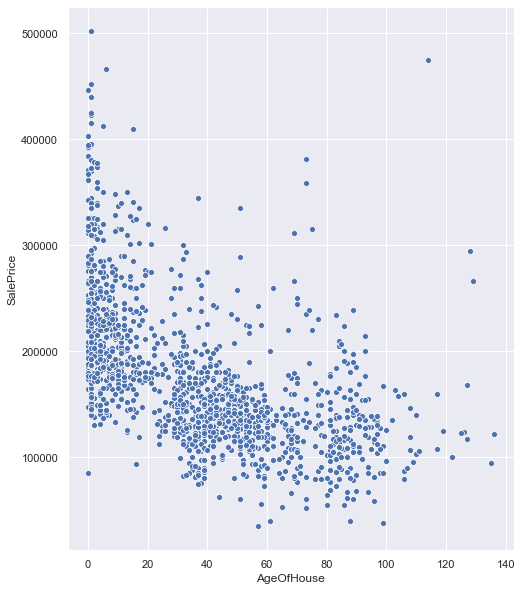

In [201]:
sns.scatterplot(x="AgeOfHouse", y ="SalePrice", data=ds_clean)

# As the age of the building has increased the sale price shows a downward trend. There are very few outlliers between age 110-130
# Number of buildings with Age of the building above 100 looks very minimal. 

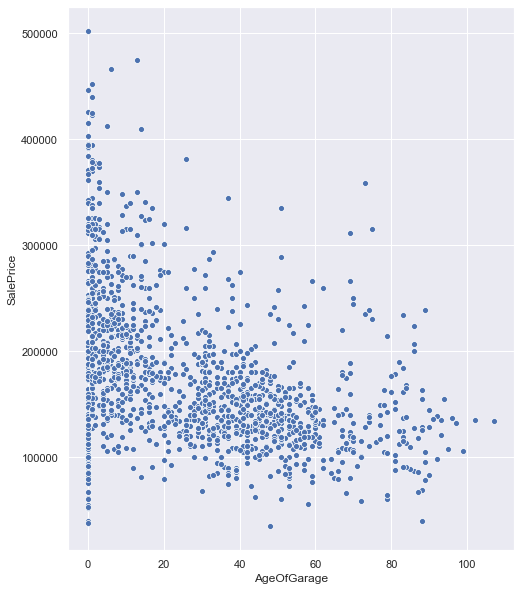

In [202]:
# Calculating age of garage, if its not built then it is zero
ds_clean["GarageYrBlt"] = ds_clean["GarageYrBlt"].apply(lambda x: 0 if x == "None" else x)
ds_clean["GarageYrBlt"] = ds_clean["GarageYrBlt"].astype(float)
ds_clean["AgeOfGarage"] = ds_clean["YrSold"] - ds_clean["GarageYrBlt"]
ds_clean["AgeOfGarage"] = ds_clean["AgeOfGarage"].apply(lambda x:0 if x>2000 else x)
sns.scatterplot(x="AgeOfGarage", y ="SalePrice", data=ds_clean)
# the trend is similar to age of the house, showing downward trend as the age increases

In [203]:
def convert_building_age(x):
   if (x > 0) & (x <= 20):
        return "<20 years"
   elif (x > 20) & (x <= 40):
        return "20-40 years"
   elif (x > 40) & (x <= 60):
        return "40-60 years"
   elif (x > 60) & (x <= 80):
        return "60-80 years"
   elif (x > 80) & (x <= 120):
        return "80-120 years"
   elif (x > 120):
        return ">120 years"

def convert_garage_age(x):
   if (x == 0):
        return "No Garage"
   elif (x > 0) & (x <= 20):
        return "<20 years"
   elif (x > 20) & (x <= 40):
        return "20-40 years"
   elif (x > 40) & (x <= 60):
        return "40-60 years"
   elif (x > 60) & (x <= 80):
        return "60-80 years"
   elif (x > 80) & (x <= 120):
        return "80-120 years"
   elif (x > 120):
        return ">120 years"

ds_clean["AgeOfHouse"] = ds_clean["AgeOfHouse"].apply(convert_building_age)
ds_clean["AgeOfGarage"] = ds_clean["AgeOfGarage"].apply(convert_garage_age)

In [204]:
# let us add a new column "IsRemodelled" = 1 if remodelled ever 0 if not
ds_clean["IsRemodelled"] = ds_clean["YearBuilt"]-ds_clean["YearRemodAdd"]
ds_clean["IsRemodelled"] = ds_clean["IsRemodelled"].apply(lambda x: 1 if x==0 else 0)
ds_clean["IsRemodelled"].value_counts()

1    732
0    661
Name: IsRemodelled, dtype: int64

In [205]:
ds_clean['TotalBath'] = ds_clean['FullBath'] + ds_clean['HalfBath']

In [206]:
ds_clean.drop(["YrSold", "YearBuilt", "YearRemodAdd", "GarageYrBlt", #"TotalBsmtSF", "1stFlrSF", "2ndFlrSF", 
              "FullBath", "HalfBath"],axis=1, inplace = True)

## Bi Variate Analysis

Let us check below 3 scenarios

1. We have seen the relationship between sale price and age, let us validate if this changes with housestyle.
2. Let us see if Neighborhood and Air condition have a pattern with sale price, this basically tells in which areas company can expect sales even if there is no central air conditioning. 
3. Let us see what type of garage condition and finish people are looking for. 

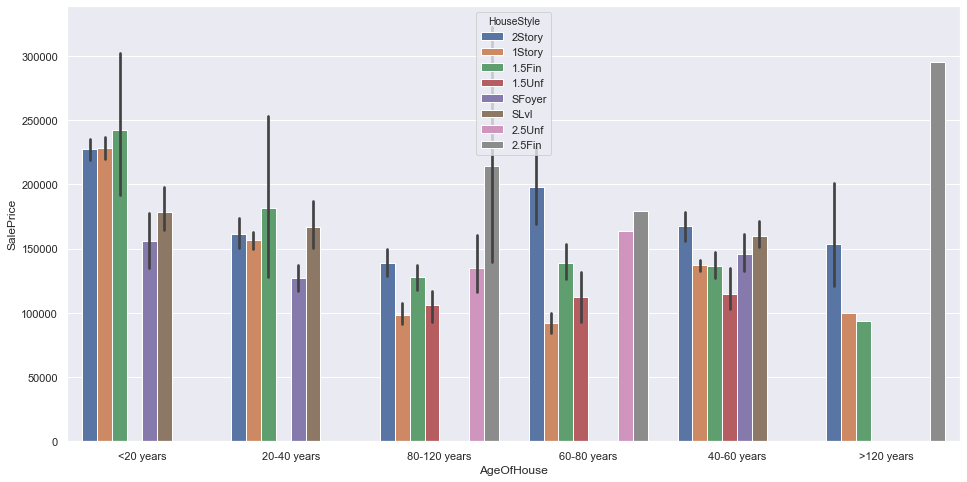

In [207]:
plt.figure(figsize=(16,8))
sns.barplot(x="AgeOfHouse", y="SalePrice", hue="HouseStyle", data = ds_clean)

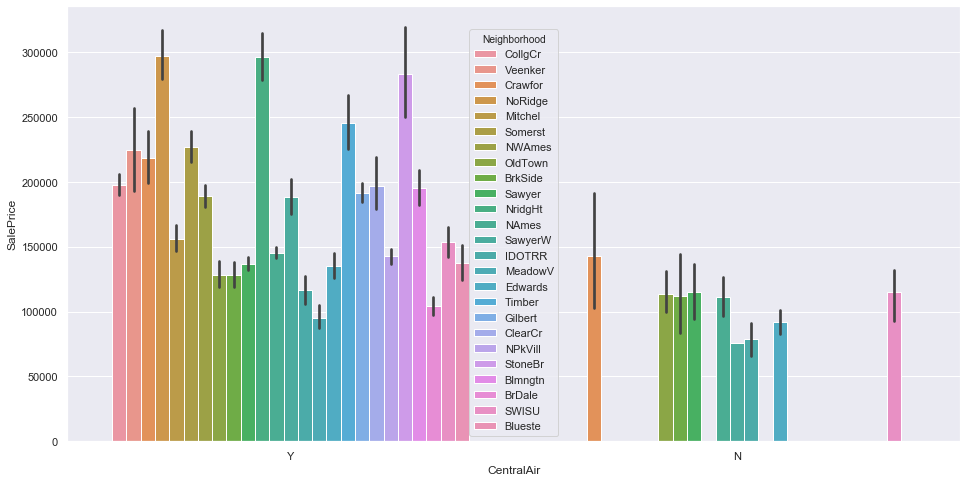

In [208]:
plt.figure(figsize=(16,8))
sns.barplot(x="CentralAir", y="SalePrice", hue="Neighborhood", data = ds_clean)

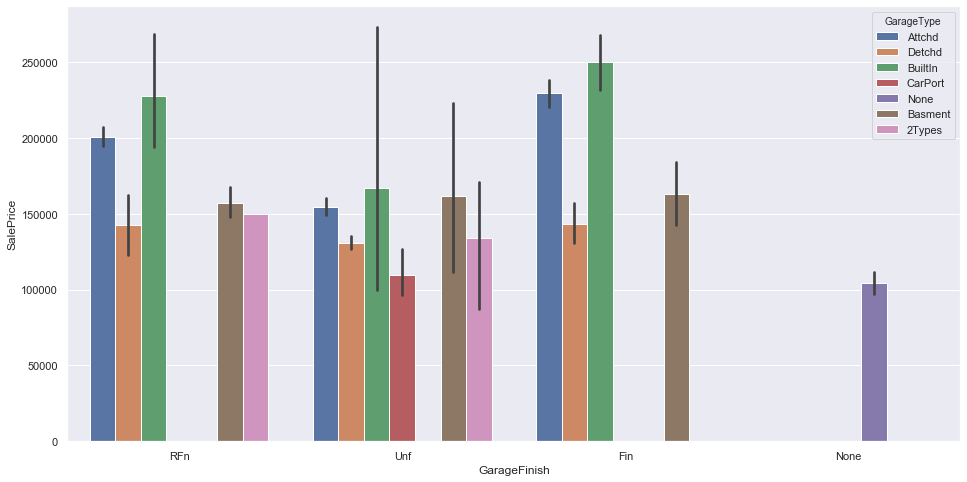

In [209]:
plt.figure(figsize=(16,8))
sns.barplot(x="GarageFinish", y="SalePrice", hue = "GarageType", data = ds_clean)

In [210]:
ds_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,AgeOfHouse,AgeOfGarage,IsRemodelled,TotalBath
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,2,WD,Normal,208500,<20 years,<20 years,1,3
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,5,WD,Normal,181500,20-40 years,20-40 years,1,2
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,9,WD,Normal,223500,<20 years,<20 years,0,3
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,2,WD,Abnorml,140000,80-120 years,<20 years,0,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,12,WD,Normal,250000,<20 years,<20 years,1,3


## Pre-processing for Prediction

In [211]:
categorical_cols = [
"AgeOfHouse",
"MSSubClass",
"MSZoning",
"Street",
"LotShape",
"LandContour",
"Utilities",
"LotConfig",
"LandSlope",
"Neighborhood",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"OverallQual",
"OverallCond",
"RoofStyle",
"RoofMatl",
"Exterior1st",
"Exterior2nd",
"MasVnrType",
"ExterQual",
"ExterCond",
"Foundation",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2",
"Heating",
"HeatingQC",
"CentralAir",
"Electrical",
"KitchenQual",
"Functional",
"FireplaceQu",
"GarageType",
"GarageFinish",
"GarageQual",
"GarageCond",
"PavedDrive",
"SaleType",
"BsmtFullBath",
"BedroomAbvGr",
"KitchenAbvGr",
"TotRmsAbvGrd",
"Fireplaces",
"GarageCars",
"TotalBath",
"AgeOfGarage",
"SaleCondition"
]

In [212]:
# Regrouping categorical variables

# Any group representing < 5% data will be grouped in others.

for col in categorical_cols:
    length = ds_clean[col].value_counts().sum()
    perc = (get_percentage(ds_clean[col].value_counts()/length) <= 5).to_frame()
    cols_to_club = perc[perc[col]==True].index.to_list()
    ds_clean.loc[ds_clean[col].isin(cols_to_club), col] = "Others"

# validate
for col in categorical_cols:
    length = ds_clean[col].value_counts().sum()
    print(get_percentage(ds_clean[col].value_counts()/length))



<20 years       34.98
40-60 years     23.67
20-40 years     20.00
80-120 years    12.13
60-80 years      8.54
Others           0.67
Name: AgeOfHouse, dtype: float64
20        36.68
Others    27.42
60        19.60
50        10.12
120        6.17
Name: MSSubClass, dtype: float64
RL        78.68
RM        15.36
Others     5.96
Name: MSZoning, dtype: float64
Pave      99.71
Others     0.29
Name: Street, dtype: float64
Reg       64.39
IR1       33.02
Others     2.58
Name: LotShape, dtype: float64
Lvl       90.81
Others     9.19
Name: LandContour, dtype: float64
AllPub    99.93
Others     0.07
Name: Utilities, dtype: float64
Inside     72.51
Corner     17.95
CulDSac     5.96
Others      3.59
Name: LotConfig, dtype: float64
Gtl       95.48
Others     4.52
Name: LandSlope, dtype: float64
Others     37.11
NAmes      15.79
CollgCr    10.70
OldTown     7.90
Edwards     6.96
Somerst     5.67
Gilbert     5.38
NWAmes      5.24
Sawyer      5.24
Name: Neighborhood, dtype: float64
Norm      86.15
Other

In [213]:
#creating dummies for categorical columns
for col in categorical_cols:
    dummies_ds = pd.get_dummies(ds_clean[col], drop_first=True, prefix=col)
    ds_clean = pd.concat([ds_clean, dummies_ds], axis=1)
    ds_clean.drop(col,inplace=True,axis=1)

In [214]:
ds_clean.info()
ds_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1458
Columns: 156 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(13), uint8(141)
memory usage: 405.9 KB


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,IsRemodelled,AgeOfHouse_40-60 years,AgeOfHouse_60-80 years,AgeOfHouse_80-120 years,AgeOfHouse_<20 years,AgeOfHouse_Others,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_Others,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Others,LotShape_Reg,LandContour_Others,Utilities_Others,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,LandSlope_Others,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Norm,Condition1_Others,Condition2_Others,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Others,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Others,RoofStyle_Hip,RoofStyle_Others,RoofMatl_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Others,MasVnrType_Stone,ExterQual_Others,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_Others,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,CentralAir_Y,Electrical_Others,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_Others,KitchenQual_TA,Functional_Typ,FireplaceQu_None,FireplaceQu_Others,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Others,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Others,GarageQual_TA,GarageCond_Others,GarageCond_TA,PavedDrive_Others,PavedDrive_Y,SaleType_Others,SaleType_WD,BsmtFullBath_1,BsmtFullBath_Others,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_Others,KitchenAbvGr_Others,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_Others,Fireplaces_1,Fireplaces_2,Fireplaces_Others,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_Others,TotalBath_2,TotalBath_3,TotalBath_Others,AgeOfGarage_40-60 years,AgeOfGarage_60-80 years,AgeOfGarage_<20 years,AgeOfGarage_No Garage,AgeOfGarage_Others,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,150,856,856,854,1710,548,0,61,2,208500,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
1,80.0,9600,0.0,978,284,1262,1262,0,1262,460,298,0,5,181500,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,68.0,11250,162.0,486,434,920,920,866,1786,608,0,42,9,223500,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
3,60.0,9550,0.0,216,540,756,961,756,1717,642,0,35,2,140000,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,490,1145,1145,1053,2198,836,192,84,12,250000,

In [215]:
ds_clean.to_csv("ds_readyforanalysis.csv")
ds_analysis = pd.read_csv("ds_readyforanalysis.csv", index_col=0)
ds_analysis.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,IsRemodelled,AgeOfHouse_40-60 years,AgeOfHouse_60-80 years,AgeOfHouse_80-120 years,AgeOfHouse_<20 years,AgeOfHouse_Others,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_Others,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Others,LotShape_Reg,LandContour_Others,Utilities_Others,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,LandSlope_Others,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Norm,Condition1_Others,Condition2_Others,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Others,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Others,RoofStyle_Hip,RoofStyle_Others,RoofMatl_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Others,MasVnrType_Stone,ExterQual_Others,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_Others,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,CentralAir_Y,Electrical_Others,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_Others,KitchenQual_TA,Functional_Typ,FireplaceQu_None,FireplaceQu_Others,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Others,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Others,GarageQual_TA,GarageCond_Others,GarageCond_TA,PavedDrive_Others,PavedDrive_Y,SaleType_Others,SaleType_WD,BsmtFullBath_1,BsmtFullBath_Others,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_Others,KitchenAbvGr_Others,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_Others,Fireplaces_1,Fireplaces_2,Fireplaces_Others,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_Others,TotalBath_2,TotalBath_3,TotalBath_Others,AgeOfGarage_40-60 years,AgeOfGarage_60-80 years,AgeOfGarage_<20 years,AgeOfGarage_No Garage,AgeOfGarage_Others,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,150,856,856,854,1710,548,0,61,2,208500,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
1,80.0,9600,0.0,978,284,1262,1262,0,1262,460,298,0,5,181500,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,68.0,11250,162.0,486,434,920,920,866,1786,608,0,42,9,223500,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
3,60.0,9550,0.0,216,540,756,961,756,1717,642,0,35,2,140000,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,490,1145,1145,1053,2198,836,192,84,12,250000,

In [216]:
ds_train, ds_test = train_test_split(ds_analysis, train_size= 0.7, test_size = 0.3, random_state = 100)
print(ds_train.shape)
print(ds_test.shape)

(975, 156)
(418, 156)


In [217]:
# Standarizing values using min max scalar
scalar = MinMaxScaler()
scaling_columns = ds_train.select_dtypes(include=["int64", "float64"]).columns
ds_train[scaling_columns] = scalar.fit_transform(ds_train[scaling_columns])
ds_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,IsRemodelled,AgeOfHouse_40-60 years,AgeOfHouse_60-80 years,AgeOfHouse_80-120 years,AgeOfHouse_<20 years,AgeOfHouse_Others,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_Others,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Others,LotShape_Reg,LandContour_Others,Utilities_Others,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,LandSlope_Others,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Norm,Condition1_Others,Condition2_Others,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Others,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Others,RoofStyle_Hip,RoofStyle_Others,RoofMatl_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Others,MasVnrType_Stone,ExterQual_Others,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_Others,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,CentralAir_Y,Electrical_Others,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_Others,KitchenQual_TA,Functional_Typ,FireplaceQu_None,FireplaceQu_Others,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Others,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Others,GarageQual_TA,GarageCond_Others,GarageCond_TA,PavedDrive_Others,PavedDrive_Y,SaleType_Others,SaleType_WD,BsmtFullBath_1,BsmtFullBath_Others,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_Others,KitchenAbvGr_Others,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_Others,Fireplaces_1,Fireplaces_2,Fireplaces_Others,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_Others,TotalBath_2,TotalBath_3,TotalBath_Others,AgeOfGarage_40-60 years,AgeOfGarage_60-80 years,AgeOfGarage_<20 years,AgeOfGarage_No Garage,AgeOfGarage_Others,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
637,0.219697,0.183110,0.000000,0.000000,0.376684,0.308014,0.207482,0.316832,0.321625,0.205128,0.000000,0.000000,0.909091,0.131204,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1054,0.522727,0.400389,0.266497,0.541546,0.061774,0.404482,0.329274,0.493949,0.505498,0.469551,0.345486,0.188088,0.909091,0.499646,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
926,0.545455,0.425975,0.431472,0.000000,0.548537,

In [218]:
# applying scale on test set
ds_test[scaling_columns] = scalar.transform(ds_test[scaling_columns])
ds_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,IsRemodelled,AgeOfHouse_40-60 years,AgeOfHouse_60-80 years,AgeOfHouse_80-120 years,AgeOfHouse_<20 years,AgeOfHouse_Others,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_Others,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Others,LotShape_Reg,LandContour_Others,Utilities_Others,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,LandSlope_Others,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Norm,Condition1_Others,Condition2_Others,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Others,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Others,RoofStyle_Hip,RoofStyle_Others,RoofMatl_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Others,MasVnrType_Stone,ExterQual_Others,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_Others,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,CentralAir_Y,Electrical_Others,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_Others,KitchenQual_TA,Functional_Typ,FireplaceQu_None,FireplaceQu_Others,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Others,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Others,GarageQual_TA,GarageCond_Others,GarageCond_TA,PavedDrive_Others,PavedDrive_Y,SaleType_Others,SaleType_WD,BsmtFullBath_1,BsmtFullBath_Others,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_Others,KitchenAbvGr_Others,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_Others,Fireplaces_1,Fireplaces_2,Fireplaces_Others,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_Others,TotalBath_2,TotalBath_3,TotalBath_Others,AgeOfGarage_40-60 years,AgeOfGarage_60-80 years,AgeOfGarage_<20 years,AgeOfGarage_No Garage,AgeOfGarage_Others,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
1414,0.325758,0.468645,0.000000,0.000000,0.386902,0.316369,0.312745,0.437294,0.462431,0.296474,0.000000,0.000000,0.454545,0.390478,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
846,0.409091,0.317396,0.173858,0.298083,0.105434,0.281048,0.292301,0.422992,0.440134,0.340545,0.406250,0.225705,0.545455,0.404124,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
780,0.318182,0.259018,0.048223,0.000000,0.574547,

In [219]:
ds_train_Y = ds_train.pop('SalePrice')
ds_train_x = ds_train
ds_test_Y = ds_test.pop('SalePrice')
ds_test_x = ds_test

In [220]:
ds_train_x.shape, ds_train_Y.shape, ds_test_x.shape, ds_test_Y.shape

((975, 155), (975,), (418, 155), (418,))

In [221]:
# since there are more columns let us get top 20

lm = LinearRegression()
lm.fit(ds_train_x, ds_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(ds_train_x, ds_train_Y)
list(zip(ds_train_x, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 93),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 25),
 ('BsmtFinSF1', False, 18),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 41),
 ('OpenPorchSF', False, 40),
 ('MoSold', False, 123),
 ('IsRemodelled', False, 119),
 ('AgeOfHouse_40-60 years', False, 102),
 ('AgeOfHouse_60-80 years', False, 50),
 ('AgeOfHouse_80-120 years', False, 24),
 ('AgeOfHouse_<20 years', False, 95),
 ('AgeOfHouse_Others', True, 1),
 ('MSSubClass_50', False, 106),
 ('MSSubClass_60', False, 92),
 ('MSSubClass_120', False, 91),
 ('MSSubClass_Others', False, 134),
 ('MSZoning_RL', False, 129),
 ('MSZoning_RM', False, 58),
 ('Street_Pave', True, 1),
 ('LotShape_Others', False, 57),
 ('LotShape_Reg', False, 76),
 ('LandContour_Others', False, 77),
 ('Utilities_Others', False, 45),
 ('LotConfig_CulDSac', False, 83),
 ('LotConfig_Inside', False, 115),
 ('LotConfig_Ot

In [222]:
col = ds_train_x.columns[rfe.support_]
col

Index(['LotArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'AgeOfHouse_Others', 'Street_Pave',
       'BsmtQual_Others', 'BsmtQual_TA', 'BsmtExposure_Others',
       'KitchenQual_Gd', 'KitchenQual_Others', 'KitchenQual_TA',
       'SaleType_Others', 'SaleType_WD', 'BsmtFullBath_Others',
       'KitchenAbvGr_Others', 'SaleCondition_Partial'],
      dtype='object')

In [223]:
ds_train_x_rfe = ds_train_x[col]
ds_test_x_rfe = ds_test_x[col]

In [224]:
# Performing Linear Regression without regularization

lr = LinearRegression()
lr.fit(ds_train_x_rfe, ds_train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [225]:
y_train_pred = lr.predict(ds_train_x_rfe)
y_test_pred = lr.predict(ds_test_x_rfe)
print(r2_score(ds_train_Y, y_train_pred))
print(r2_score(ds_test_Y, y_test_pred))

0.8601092848749727
0.7984327550962782


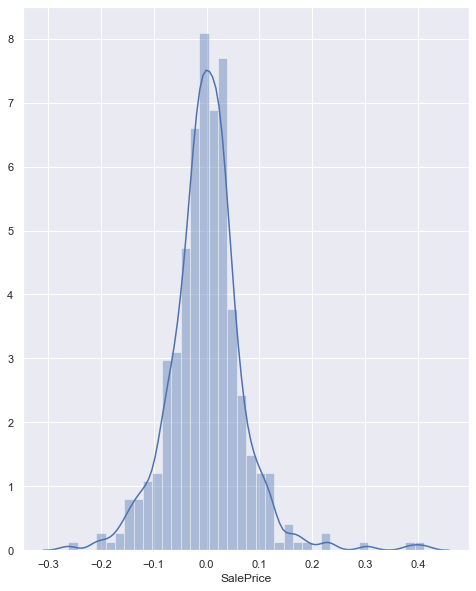

In [226]:
# validating error distribution
sns.distplot(ds_test_Y-y_test_pred)

In [227]:
# coefficients which LR has created without regularization
lr.coef_

array([ 0.07173537, -0.10116395,  0.34758967,  0.21929468,  0.22891762,
        0.08103697,  0.14866362, -0.095488  ,  0.07599427, -0.05546379,
       -0.04114735,  0.08743848, -0.10567473, -0.14095135, -0.14495614,
       -0.41950116, -0.40275153,  0.06441318, -0.08635162, -0.34538882])

Text(0.5, 1.0, 'Coefficients in the Linear Regression')

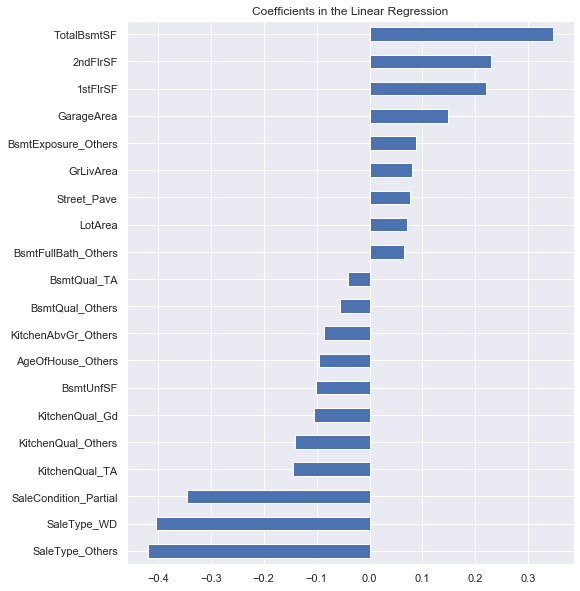

In [228]:
# features chosen by LR
imp_coef = get_key_predictors(lr, ds_train_x_rfe)
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Linear Regression")

## Lasso Regularization

In [229]:
params = { 'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 25, 50, 75, 100, 150, 500, 1000]}
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, params, scoring='r2', cv=folds, return_train_score=True)
lasso_regressor.fit(ds_train_x_rfe, ds_train_Y)
print(lasso_regressor.best_params_)
print(get_percentage(lasso_regressor.best_score_))

{'alpha': 0.0001}
83.7


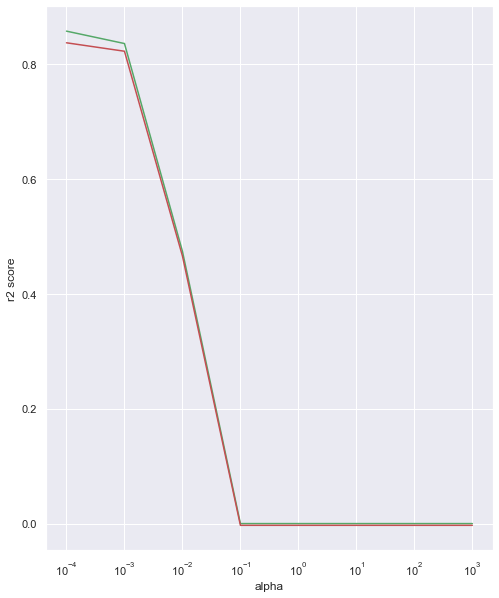

<Figure size 576x288 with 0 Axes>

In [230]:
# plot
cv_results = pd.DataFrame(lasso_regressor.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], 'g')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], 'r')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.figure(figsize=(8,4))
plt.show()

## Ridge Regression

In [231]:
params = { 'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.75,1, 10, 25, 50, 75, 100, 150, 500, 1000]}
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
ridge = Ridge()
ridge_regressor = GridSearchCV(ridge, params, scoring='r2', cv=folds, return_train_score=True)
ridge_regressor.fit(ds_train_x_rfe, ds_train_Y)
print(ridge_regressor.best_params_)
print(get_percentage(ridge_regressor.best_score_))

{'alpha': 0.5}
83.93


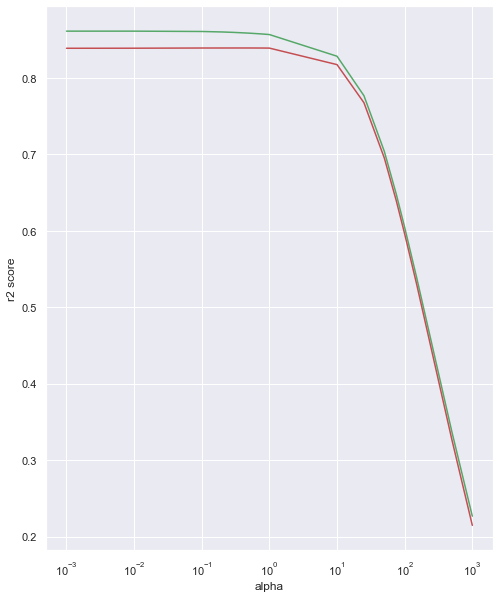

In [232]:
cv_results = pd.DataFrame(ridge_regressor.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], 'g')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], 'r')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

## Final Lasso and Ridge Regression

0.8349962312389049
0.8148117331859828
Lasso picked 12 variables and eliminated the other 8 variables
0.020184498052922106


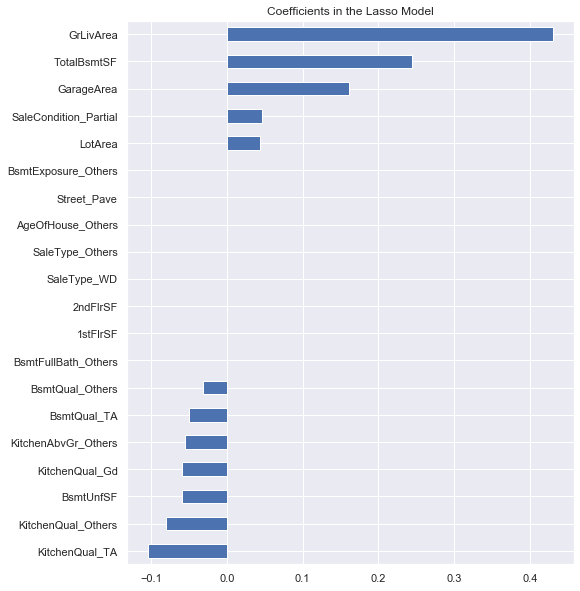

In [233]:
# Lasso test Prediction

lm = Lasso(alpha=0.001)
lm.fit(ds_train_x_rfe, ds_train_Y)
y_train_pred = lm.predict(ds_train_x_rfe)
print(r2_score(ds_train_Y, y_train_pred))
y_test_pred = lm.predict(ds_test_x_rfe)
print(r2_score(ds_test_Y, y_test_pred))
coef = pd.Series(lm.coef_, index = ds_train_x_rfe.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef_lasso = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_lasso.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
print(r2_score(ds_train_Y, y_train_pred)-r2_score(ds_test_Y, y_test_pred))

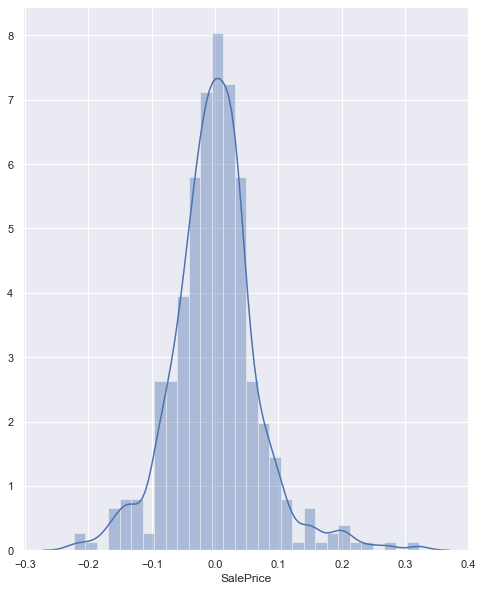

In [234]:
sns.distplot(ds_test_Y-y_test_pred)

Text(0, 0.5, 'y_test_pred')

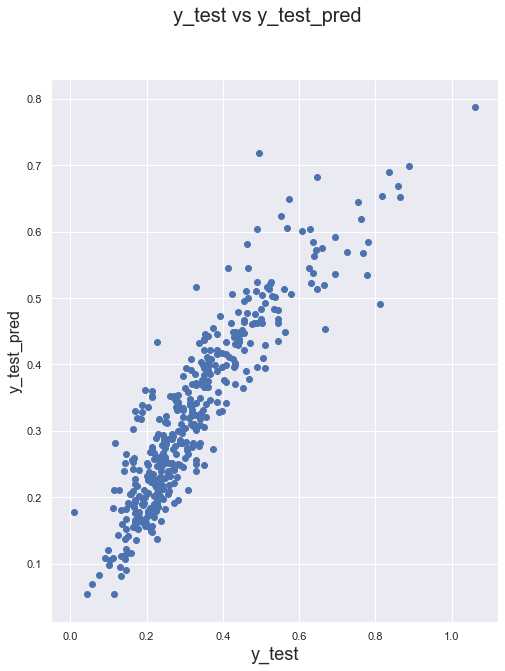

In [235]:
fig = plt.figure()
plt.scatter(ds_test_Y, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)   

0.857606387119161
0.8254710609191988
0.03213532619996229


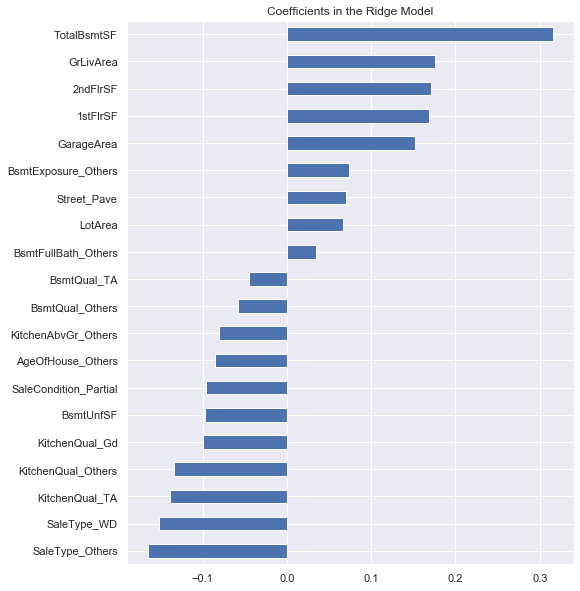

In [236]:
# Ridge test Prediction
lm = Ridge(alpha=0.5)
lm.fit(ds_train_x_rfe, ds_train_Y)
y_train_pred = lm.predict(ds_train_x_rfe)
print(r2_score(ds_train_Y, y_train_pred))
y_test_pred = lm.predict(ds_test_x_rfe)
print(r2_score(ds_test_Y, y_test_pred))
coef = pd.Series(lm.coef_, index = ds_train_x_rfe.columns)
imp_coef_ridge = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_ridge.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
#diff in train and test 2 score
print(r2_score(ds_train_Y, y_train_pred)-r2_score(ds_test_Y, y_test_pred))

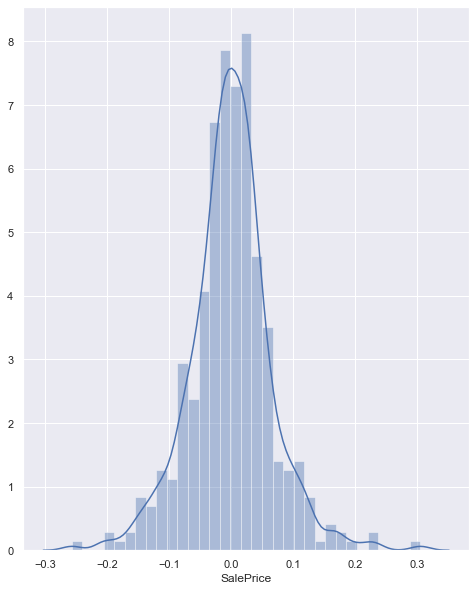

In [237]:
sns.distplot(ds_test_Y-y_test_pred)

Text(0, 0.5, 'y_test_pred')

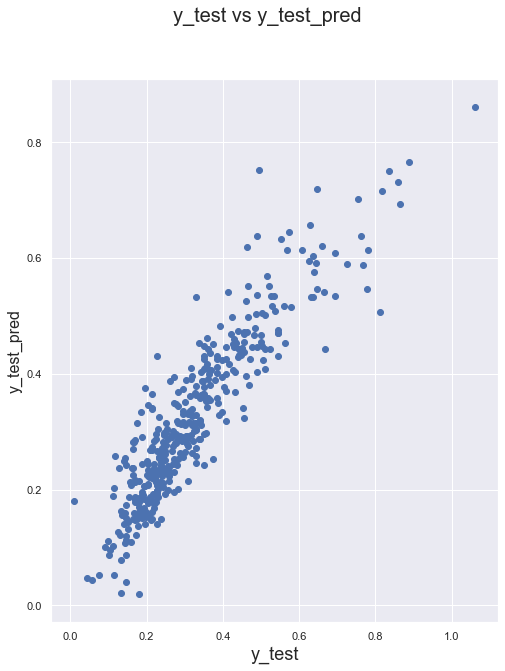

In [238]:
fig = plt.figure()
plt.scatter(ds_test_Y, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)   

In [239]:
## Summary

# Significant Variables and how well they describe the price of house

print("Lasso - Significant Variables\n")
print(imp_coef_lasso.sort_values(ascending=False))


print("Ridge - Significant Variables\n")
print(imp_coef_ridge.sort_values(ascending=False))


Lasso - Significant Variables

GrLivArea                0.431175
TotalBsmtSF              0.243917
GarageArea               0.160811
SaleCondition_Partial    0.046793
LotArea                  0.043586
SaleType_WD             -0.000000
BsmtFullBath_Others      0.000000
1stFlrSF                 0.000000
2ndFlrSF                 0.000000
SaleType_Others         -0.000000
AgeOfHouse_Others       -0.000000
Street_Pave              0.000000
BsmtExposure_Others      0.000000
BsmtQual_Others         -0.031379
BsmtQual_TA             -0.049583
KitchenAbvGr_Others     -0.055627
KitchenQual_Gd          -0.059065
BsmtUnfSF               -0.059605
KitchenQual_Others      -0.080783
KitchenQual_TA          -0.104682
dtype: float64
Ridge - Significant Variables

TotalBsmtSF              0.316271
GrLivArea                0.175493
2ndFlrSF                 0.170760
1stFlrSF                 0.169084
GarageArea               0.151877
BsmtExposure_Others      0.073388
Street_Pave              0.070186
LotAr